**semantic scolar**

In [ ]:
import requests

# Basic search parameters
url = "https://api.semanticscholar.org/graph/v1/paper/search"
params = {
    'query': 'transformer models',
    'fields': 'title,authors,year,citationCount,abstract',
    'limit': 200
}

# headers = {
#     'x-api-key': 'YOUR_API_KEY'  # if you have one (optional but recommended)
# }

response = requests.get(url, params=params)
data = response.json()

print(data)

{'message': 'Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form', 'code': '429'}


In [13]:
import requests
import pandas as pd
# Basic search parameters
url = "https://api.semanticscholar.org/graph/v1/paper/search/bulk"
params = {
    'query': 'transformer models',
    'fields': 'title,authors,venue,publicationVenue,year,publicationDate,citationCount,abstract,influentialCitationCount,fieldsOfStudy,publicationTypes',
    'limit': 200
}

# headers = {
#     'x-api-key': 'YOUR_API_KEY'  # if you have one (optional but recommended)
# }

response = requests.get(url, params=params)
data = response.json()

print(data)

{'total': 104983, 'token': 'PCOKWVSKJJGM4TWNJNI3EUSQJIWVNUSRKBFEYK2JFUBHFI4VBSGEYDONRRJNEUSSSKGE2DIMJWG42TGMZXGM2LCSZSJSYTKTRUWQ3TBMBTGVGLAMSVRGWAO7G4JVG', 'data': [{'paperId': '0000efab1ef383cc17b1816c8612f1c6acc43dcc', 'publicationVenue': None, 'title': 'Waveform Similarity Comparison Protection Scheme for Multi terminal Distribution Network Based on Fault Self-synchronization and 5G Communication', 'abstract': 'With the wide access of distributed new energy, how to quickly identify and accurately isolate the fault of distribution network is a key technical problem to be solved in the industry. Due to the numerous branches of the distribution network, the imperfect data acquisition network, and the transmission error of the transformer, there is an urgent need for new means to cope with the synchronization problem of data acquisition in different locations. To solve the above problems, firstly, the characteristics of multi terminal distribution network in case of fault are analyzed, 

In [5]:
import requests
import pandas as pd

# Update search parameters to include the needed fields
url = "https://api.semanticscholar.org/graph/v1/paper/search/bulk"
params = {
    'query': 'hydrogen battery electric vehicle ',
    'fields': 'title,authors,venue,publicationVenue,year,publicationDate,citationCount,abstract,influentialCitationCount,fieldsOfStudy,publicationTypes',
    'limit': 200
}

response = requests.get(url, params=params)
data = response.json()




In [6]:
# Debug print to check keys for the first paper
if data.get('data'):
    print("Available keys in first paper:", data['data'][0].keys())

papers = data.get('data', [])
rows = []
for paper in papers:
    # Safely handle the possibility of publicationVenue being None
    pub_venue = paper.get('publicationVenue') or {}
    pub_venue_name = pub_venue.get('name') if isinstance(pub_venue, dict) else paper.get('venue')
    pub_venue_type = pub_venue.get('type') if isinstance(pub_venue, dict) else 'unknown'
    
    # Get publication date with a fallback value (if missing, use 'Unknown')
    pub_date = paper.get('publicationDate', 'Unknown')
    
    # Extract author names
    authors = paper.get('authors', [])
    author_names = [author.get('name', '') for author in authors]
    
    # Build row dictionary
    row = {
        'Title': paper.get('title', ''),
        'Abstract': paper.get('abstract', ''),
        'PublicationVenueName': pub_venue_name or paper.get('venue'),
        'PublicationVenueType': pub_venue_type,
        'Year': paper.get('year', None),
        'ReferenceCount': paper.get('referenceCount', None),
        'CitationCount': paper.get('citationCount', None),
        'InfluentialCitationCount': paper.get('influentialCitationCount', None),
        'FieldsOfStudy': paper.get('fieldsOfStudy', []),
        'PublicationTypes': paper.get('publicationTypes', []),
        'PublicationDate': pub_date,
        'Authors': ', '.join(author_names) if author_names else None
    }
    rows.append(row)

# Create DataFrame and display the first few rows
sem_df = pd.DataFrame(rows)
sem_df.head()

Available keys in first paper: dict_keys(['paperId', 'publicationVenue', 'title', 'abstract', 'venue', 'year', 'citationCount', 'influentialCitationCount', 'openAccessPdf', 'fieldsOfStudy', 'publicationTypes', 'publicationDate', 'authors'])


,Title,Abstract,PublicationVenueName,PublicationVenueType,Year,ReferenceCount,CitationCount,InfluentialCitationCount,FieldsOfStudy,PublicationTypes,PublicationDate,Authors
0,SNAP: Future Fuels at WPI,None,,None,2009.0,None,0,0,"[Business, Engineering]",None,None,"Frank J. Hoey, Jeff L. Perron, Maria Alexandra..."
1,Round-the-Clock Solar Lighting and Providing t...,None,Journal of Electrical Engineering and Electron...,None,2024.0,None,0,0,None,[JournalArticle],2024-11-07,Michael Shoikhedbrod
2,Dynamic Simulation using ECMS Controller to Op...,None,SAE technical paper series,None,2023.0,None,1,0,None,None,2023-04-11,"S. Vankayala, Philippe De Araujo, Michael Zagu..."
3,Progress of hydrogen storage alloys for Ni-MH ...,None,,None,2017.0,None,228,1,[Materials Science],[Review],2017-10-01,"L. Ouyang, Jianling Huang, Hui Wang, Jiangwen ..."
4,Electrospinning of Nanofibers for K-Ion Battery,None,,None,2020.0,None,0,0,[Materials Science],None,None,"Shengjie Peng, P. Ilango"


In [17]:
len(sem_df)

1000

In [7]:
sem_df.columns

Index(['Title', 'Abstract', 'PublicationVenueName', 'PublicationVenueType',
       'Year', 'ReferenceCount', 'CitationCount', 'InfluentialCitationCount',
       'FieldsOfStudy', 'PublicationTypes', 'PublicationDate', 'Authors'],
      dtype='object')

Text(0.5, 1.0, 'Publications per Year')

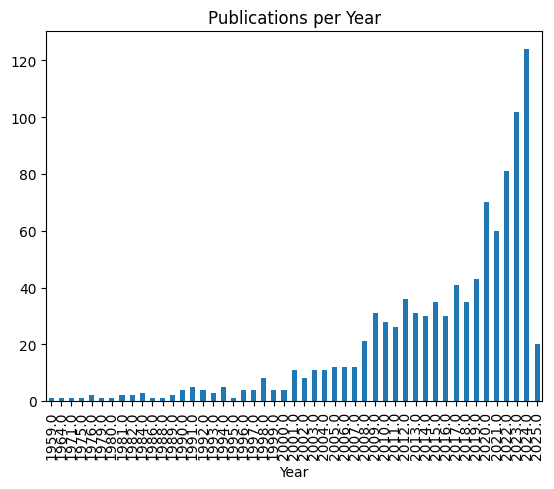

In [8]:
import matplotlib.pyplot as plt
sem_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Publications per Year")

In [9]:
# Top 10 influential papers
sem_df.sort_values('InfluentialCitationCount', ascending=False).head(10)

,Title,Abstract,PublicationVenueName,PublicationVenueType,Year,ReferenceCount,CitationCount,InfluentialCitationCount,FieldsOfStudy,PublicationTypes,PublicationDate,Authors
224,"Modern electric, hybrid electric, and fuel cel...",None,,None,2009.0,None,1816,128,"[Engineering, Computer Science]",None,2009-09-21,"M. Ehsani, Yimin Gao, A. Emadi"
49,Electric Vehicle Technology Explained,None,,None,2003.0,None,664,50,[Engineering],None,None,"J. Larminie, J. Lowry"
307,"Review of solutions to global warming, air pol...",None,,None,2009.0,None,1512,42,"[Engineering, Geology]",[Review],2009-01-21,M. Jacobson
174,A Comparative Study of Energy Management Schem...,None,IEEE transactions on industrial electronics (1...,None,2014.0,None,437,33,"[Computer Science, Engineering]",[JournalArticle],2014-03-01,"S. Motapon, L. Dessaint, K. Al-haddad"
12,Electric powertrains : opportunities and chall...,None,,None,2007.0,None,259,22,[Engineering],None,None,M. Kromer
22,Cost-Optimal Energy Management of Hybrid Elect...,None,IEEE transactions on power electronics,journal,2020.0,None,278,14,[Computer Science],None,2020-01-01,"Xiaosong Hu, Changfu Zou, Xiaolin Tang, Teng L..."
615,Hybrid Vehicles : and the Future of Personal T...,None,,None,2008.0,None,157,12,[Engineering],[Review],2008-09-19,A. Fuhs
19,Energy Storage for Power Grids and Electric Tr...,None,,None,2012.0,None,87,12,[Engineering],None,2012-03-27,P. Parfomak
499,Emissions of greenhouse gases from the use of ...,None,,None,1991.0,None,193,11,[Chemistry],None,1991-11-01,M. Deluchi
275,Methanol,None,Journal of Applied Toxicology,journal,NaN,None,200,10,[Medicine],"[Editorial, JournalArticle, Review]",None,Gregory A. Dolan


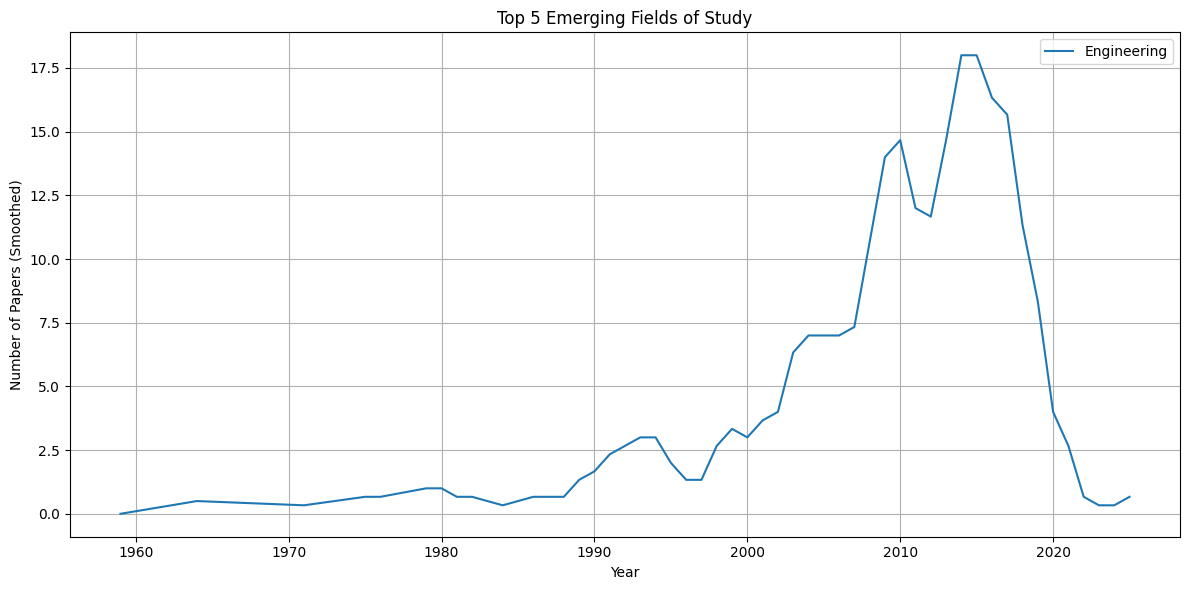

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Explode FieldsOfStudy so each field gets its own row
df_exploded = sem_df.explode('FieldsOfStudy')

# Group by Year and Field, then count papers
field_counts = (
    df_exploded
    .groupby(['Year', 'FieldsOfStudy'])
    .size()
    .reset_index(name='PaperCount')
)

# Pivot for heatmap-style analysis or trend lines
field_pivot = field_counts.pivot(index='Year', columns='FieldsOfStudy', values='PaperCount').fillna(0)

# Optional: Smooth with rolling average (e.g., 3 years)
field_pivot_smooth = field_pivot.rolling(window=3, min_periods=1).mean()

# Plot top 5 trending fields by recent growth
recent_years = field_pivot_smooth.index[-3:]  # Last 3 years
growth = field_pivot_smooth.loc[recent_years].pct_change().mean()
top_growth_fields = growth.sort_values(ascending=False).head(1).index

# Plot trends
plt.figure(figsize=(12, 6))
for field in top_growth_fields:
    plt.plot(field_pivot_smooth.index, field_pivot_smooth[field], label=field)

plt.title('Top 5 Emerging Fields of Study')
plt.xlabel('Year')
plt.ylabel('Number of Papers (Smoothed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


google scolar

In [ ]:
import requests
import time
import json

# API details
url = "https://www.searchapi.io/api/v1/search"
api_key = "Qeg1buThqizr68MqzRKFLpEN"
query = "hydrogen battery"

all_results = []

# Loop through pages 1 to 50
for page in range(1, 51):
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error on page {page}: {response.status_code}")
        continue
    
    data = response.json()
    organic_results = data.get("organic_results", [])
    all_results.extend(organic_results)
    
    time.sleep(1)  # polite delay, can reduce or remove if needed

# Save all results as JSON
# with open("langchain_results.json", "w", encoding='utf-8') as f:
#     json.dump(all_results, f, ensure_ascii=False, indent=2)

# print(f"Saved {len(all_results)} results to langchain_results.json")


Error on page 1: 429
Error on page 2: 429
Error on page 3: 429
Error on page 4: 429
Error on page 5: 429
Error on page 6: 429
Error on page 7: 429
Error on page 8: 429
Error on page 9: 429
Error on page 10: 429
Error on page 11: 429
Error on page 12: 429
Error on page 13: 429
Error on page 14: 429
Error on page 15: 429
Error on page 16: 429
Error on page 17: 429
Error on page 18: 429
Error on page 19: 429
Error on page 20: 429
Error on page 21: 429
Error on page 22: 429
Error on page 23: 429


google news

In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

KeyError: "['Title', 'Source', 'RelativeDate', 'Snippet'] not in index"

In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."


**google patents**

In [ ]:
import requests

params = {
    "engine": "google_patents",
    "q": "technology trend monitoring",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"  # Replace with your key
}

response = requests.get("https://www.searchapi.io/api/v1/search", params=params)
gpdata = response.json()
gpdata.keys()

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'organic_results', 'summary', 'pagination'])

In [ ]:
if 'organic_results' in gpdata and gpdata['organic_results'] : 
  print(gpdata['organic_results'][0].keys())

dict_keys(['position', 'rank', 'patent_id', 'title', 'snippet', 'priority_date', 'filing_date', 'grant_date', 'publication_date', 'inventor', 'assignee', 'publication_number', 'language', 'pdf', 'country_status'])


**google scolar**

In [ ]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "Langchain"
results = []

# Loop through first 50 pages
for page in range(1, 21):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 20,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    data = response.json()
    
    # Extract and add the organic results
    organic_results = data.get("organic_results", [])
    results.extend(organic_results)
    
    # Optional: Be polite to the API (1-second delay)
    time.sleep(1)

# Convert to DataFrame
gsc_data = pd.DataFrame(results)

# Export to Excel
#df.to_excel("langchain_scholar_results.xlsx", index=False)

print(f"Scraped {len(results)} results across 50 pages.")


Scraped 500 results across 50 pages.


In [ ]:
import requests
import time  # in case we want to be polite and add delays
import pandas as pd

# Setup
url = "https://www.searchapi.io/api/v1/search"
api_key = "BdVJ9kUYpdfAw6RYXy1t6KQm"

# Parameters
query = "Langchain"
results = []

# Loop through first 50 pages
for page in range(1, 6):  # Pages 1 to 50
    params = {
        "engine": "google_scholar",
        "q": query,
        "api_key": api_key,
        "num": 30,         # max per page
        "page": page
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Failed on page {page}: {response.status_code}")
        continue

    gsc_data = response.json()
    gsc_data.keys()
  

print(f"Scraped {len(gsc_data)} results across 5 pages.")


Scraped 0 results across 5 pages.


In [ ]:
#gsc_data.to_excel('google_scolar_data.xlsx')

In [ ]:
if 'organic_results' in gsc_data and gsc_data['organic_results'] : 
  print(gsc_data['organic_results'][0].keys())

dict_keys(['position', 'title', 'data_cid', 'link', 'publication', 'snippet', 'inline_links'])


In [ ]:
# Let's inspect one search result
result = gsc_data["organic_results"][1]

for key in result:
    print(f"{key}: Type -> {type(result[key])}, Sample -> {result[key]}")


position: Type -> <class 'int'>, Sample -> 2
title: Type -> <class 'str'>, Sample -> Automated Generation and Evaluation of MultipleChoice Quizzes using Langchain and Gemini LLM
data_cid: Type -> <class 'str'>, Sample -> Qduivk7Vf4gJ
link: Type -> <class 'str'>, Sample -> https://ieeexplore.ieee.org/abstract/document/10739326/
publication: Type -> <class 'str'>, Sample -> P Pawar, R Dube, A Joshi, Z Gulhane… - … on Electrical Electronics …, 2024 - ieeexplore.ieee.org
snippet: Type -> <class 'str'>, Sample -> The research study investigates the use of cutting-edge technologies like Langchain and … uses Gemini AI to generate MCQs and Langchain for rapid engineering are covered in this …
inline_links: Type -> <class 'dict'>, Sample -> {'cited_by': {'cites_id': '9835814645382961985', 'total': 1, 'link': 'https://scholar.google.com/scholar?cites=9835814645382961985&as_sdt=40000005&sciodt=0,22&hl=en&num=20'}, 'related_articles_link': 'https://scholar.google.com/scholar?q=related:Qduivk7Vf4gJ

In [ ]:
import pandas as pd

# Assuming data contains your JSON response
gsc_results = gsc_data.get("organic_results", [])
records = []

for item in gsc_results:
    # Extract authors names from each author dictionary.
    authors_list = item.get("authors", [])
    author_names = [author.get("name", "") for author in authors_list if isinstance(author, dict)]
    
    # Initialize citation_count
    citation_count = 0
    inline_links = item.get("inline_links", {})
    # Check if 'cited_by' exists and is a dict, then extract 'total'
    if isinstance(inline_links, dict) and 'cited_by' in inline_links:
        cited_by = inline_links.get("cited_by")
        if isinstance(cited_by, dict):
            citation_count = cited_by.get("total", 0)
    
    record = {
        "Title": item.get("title"),
        "Authors": ", ".join(author_names) if author_names else None,
        "Publication": item.get("publication"),
        "Snippet": item.get("snippet"),
        "Citation_Count": citation_count,
    }
    records.append(record)

gcs_df = pd.DataFrame(records)
gcs_df.head()




,Title,Authors,Publication,Snippet,Citation_Count
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8


In [ ]:
# Split the 'publication' column into three parts
gcs_df[['authors', 'venue', 'year_source']] = gcs_df['Publication'].str.split(' - ', n=2, expand=True)


In [ ]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar","2024 International Conference on …, 2024",ieeexplore.ieee.org
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…","… on Electrical Electronics …, 2024",ieeexplore.ieee.org
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…","2024 2nd International …, 2024",ieeexplore.ieee.org
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…","… : Indonesian Journal of …, 2024",journal.irpi.or.id
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,"arXiv preprint arXiv:2310.12430, 2023",arxiv.org


In [ ]:
def split_venue_year(row):
    val = row['venue']
    
    # If it's only a 4-digit year
    if val and len(val.strip()) == 4:
        return pd.Series({'venue': None, 'year': val.strip()})
    
    # If it contains a comma, split on the last comma
    if isinstance(val, str) and ',' in val:
        parts = val.rsplit(',', 1)
        return pd.Series({'venue': parts[0].strip(), 'year': parts[1].strip()})
    
    # Otherwise, return the venue as-is and year as None
    return pd.Series({'venue': val, 'year': None})

# Apply only after the first split
gcs_df[['venue', 'year']] = gcs_df.apply(split_venue_year, axis=1)


In [ ]:
gcs_df.head()

,Title,Authors,Publication,Snippet,Citation_Count,authors,venue,year_source,year
0,Context-Aware Summarization for PDF Documents ...,None,"A Ramprasad, P Sivakumar - 2024 International ...","… LangChain, which streamlines the development...",2,"A Ramprasad, P Sivakumar",2024 International Conference on …,ieeexplore.ieee.org,2024
1,Automated Generation and Evaluation of Multipl...,None,"P Pawar, R Dube, A Joshi, Z Gulhane… - … on El...",The research study investigates the use of cut...,1,"P Pawar, R Dube, A Joshi, Z Gulhane…",… on Electrical Electronics …,ieeexplore.ieee.org,2024
2,AI-enabled semantic web,N Dhanda,"A Saeed, N Dhanda, AS Rao… - 2024 2nd Internat...",… The methodology begins by setting up the ess...,3,"A Saeed, N Dhanda, AS Rao…",2024 2nd International …,ieeexplore.ieee.org,2024
3,Penerapan Teknologi LangChain pada Question An...,"S Rahayu, NS Harahap, S Agustian","S Rahayu, NS Harahap, S Agustian… - … : Indone...","… Therefore, this research aims to create a we...",1,"S Rahayu, NS Harahap, S Agustian…",… : Indonesian Journal of …,journal.irpi.or.id,2024
4,Docxchain: A powerful open-source toolchain fo...,C Yao,"C Yao - arXiv preprint arXiv:2310.12430, 2023 ...","In this report, we introduce DocXChain, a powe...",8,C Yao,arXiv preprint arXiv:2310.12430,arxiv.org,2023


In [ ]:
gcs_df.to_excel('gcs_df.xlsx')

**IEEE Xplore**

In [ ]:
import requests

API_KEY = "shrw4werbra7k85hqn6ghzr2"
response = requests.get(
    "http://ieeexploreapi.ieee.org/api/v1/search/articles",
    params={"querytext": "AI", "apikey": API_KEY}
)

print("Status Code:", response.status_code)  # Check if 200, 403, 429, etc.
print("Raw Response:", response.text)  # See what's actually returned

Status Code: 403
Raw Response: <h1>Developer Inactive</h1>


**google news**

In [1]:
import requests

url = "https://www.searchapi.io/api/v1/search"
params = {
  "engine": "google_news",
  "q": "hydrogen battery electric vehicle ",
  "location": "New York,United States",
  "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

response = requests.get(url, params=params)
news_data = response.json()
news_data.keys()


dict_keys(['error'])

In [2]:
if 'organic_results' in news_data and news_data['organic_results'] : 
  print(news_data['organic_results'][0].keys())

In [3]:
# Let's inspect one search result
news_result = news_data["organic_results"][4]

for key in news_result:
    print(f"{key}: Type -> {type(news_result[key])}, Sample -> {news_result[key]}")

KeyError: 'organic_results'

In [ ]:
import pandas as pd

# Suppose news_results is the list from your API response (i.e., response.json()['news_results'])
news_results = data.get("organic_results", [])

# Create a list of dictionaries with only the required keys
records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

# Create the DataFrame
df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


In [ ]:
import pandas as pd

# Use the correct key for news results
news_results = data.get("organic_results", [])

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "Date": item.get("date"),
        "Snippet": item.get("snippet")
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()


,Title,Source,Date,Snippet
0,Creating large language model applications utilizing lan...,None,None,… LangChain has been widely recognized in the AI communi...
1,Systematic literature review langchain proposed,None,None,While systematic literature reviews are frequently carri...
2,LangChain,None,None,… This paper provides an in-depth analysis of LangChain’...
3,Automating Customer Service using LangChain: Building cu...,None,None,"In the digital age, the dynamics of customer service are..."
4,LangChain v0. 3,None,None,… This paper provides an in-depth analysis of LangChain’...


Available keys in news items:
dict_keys(['position', 'title', 'link', 'source', 'date', 'snippet', 'favicon', 'thumbnail'])

Sample item structure:
{'position': 1, 'title': "Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 billion after Donald Trump's ‘discounted’ reciprocal", 'link': 'https://timesofindia.indiatimes.com/technology/tech-news/elon-musk-jeff-bezos-and-mark-zuckerberg-lose-42-6-billion-as-trump-announces-discounted-reciprocal-tariffs/articleshow/120010512.cms', 'source': 'Times of India', 'date': '12 hours ago', 'snippet': 'TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk collectively lost $42.6 billion in a day due to new tariffs announced by President...', 'favicon': '', 'thumbnail': ''}

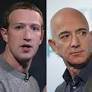

In [ ]:
# Print the structure of the first news result
if news_data.get("organic_results"):
    first_item = news_data["organic_results"][0]
    print("Available keys in news items:")
    print(first_item.keys())
    
    print("\nSample item structure:")
    print(first_item)

In [ ]:
import pandas as pd

news_results = news_data.get("organic_results", [])

records = []
for item in news_results:
    # Different APIs use different key names - adjust accordingly
    record = {
        "Title": item.get("title"),
        # Common variations for source
        "Source": item.get("source") or  # Nested source
                  item.get("publisher") or
                  item.get("site"),
        # Common variations for date
        "Date": item.get("date") or
                item.get("published_date") or
                item.get("pub_date"),
        "Snippet": item.get("snippet"),
        # Additional useful fields
        
    }
    records.append(record)

df = pd.DataFrame(records)
df.head()

,Title,Source,Date,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,"MacKenzie Scott has ""transformed"" philanthropy since her..."


In [ ]:
import requests
import pandas as pd
import dateparser
from datetime import datetime

url = "https://www.searchapi.io/api/v1/search"
params = {
    "engine": "google_news",
    "q": "Jeff Bezos news",
    "location": "New York,United States",
    "api_key": "Qeg1buThqizr68MqzRKFLpEN"
}

# Fetch data from API
response = requests.get(url, params=params)
news_data = response.json()

# Process news results
news_results = news_data.get("organic_results", [])

def parse_relative_date(date_str):
    """Convert relative date strings to datetime objects"""
    if not date_str:
        return None
    try:
        # Parse relative date (e.g., "1 day ago")
        parsed_date = dateparser.parse(date_str)
        
        # For dates without year information, ensure we don't default to 2000
        if parsed_date and parsed_date.year == 2000:
            current_year = datetime.now().year
            parsed_date = parsed_date.replace(year=current_year)
            
        return parsed_date
    except:
        return None

records = []
for item in news_results:
    record = {
        "Title": item.get("title"),
        "Source": item.get("source"),
        "RelativeDate": item.get("date"),  # Original string (e.g., "1 day ago")
        "Date": parse_relative_date(item.get("date")),  # Parsed datetime
        "Snippet": item.get("snippet"),
        "Link": item.get("link"),
        "HasThumbnail": bool(item.get("thumbnail")),
        "Position": item.get("position")
    }
    records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Format the datetime for display
df['FormattedDate'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M') if not df.empty else None

# Show results
df[['Title', 'Source', 'RelativeDate', 'FormattedDate', 'Snippet']].head()

,Title,Source,RelativeDate,FormattedDate,Snippet
0,"Elon Musk, Jeff Bezos and Mark Zuckerberg lose $42.6 bil...",Times of India,12 hours ago,2025-04-07 03:14,"TECH NEWS : Mark Zuckerberg, Jeff Bezos, and Elon Musk c..."
1,Washington Post Opinions section anxiously awaits new le...,Fox News,3 days ago,2025-04-04 15:14,The Washington Post has faced an exodus of talent in rec...
2,"What to know about Bezos Academy, the Jeff Bezos prescho...",The Arizona Republic,1 day ago,2025-04-06 15:14,Bezos Academy will open in Glendale in September and off...
3,"Under Trump and Musk, billionaires wield unprecedented i...",The Guardian,21 hours ago,2025-04-06 18:14,Government officials and contractors long controlled spy...
4,MacKenzie Scott Has Given Away $19 Billion Since Divorce...,People.com,14 hours ago,2025-04-07 01:14,"MacKenzie Scott has ""transformed"" philanthropy since her..."
